In [1]:
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow import keras

(train_input,train_target),(test_input,test_target)=imdb.load_data(num_words=500)
train_input,val_input,train_target,val_target=train_test_split(train_input,train_target,test_size=0.2,random_state=42)
lengths=np.array([len(x) for x in train_input])
print(np.mean(lengths),np.median(lengths))


239.00925 178.0


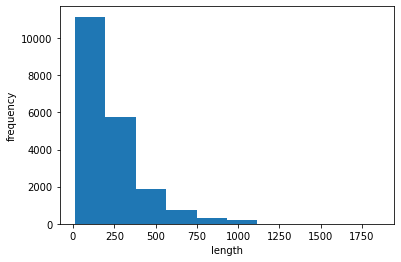

In [4]:
plt.hist(lengths)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

In [2]:
train_seq=pad_sequences(train_input,maxlen=100)
print(train_seq.shape)
print(train_seq[0])
print(train_input[0][-10])
print(train_seq[5])


(20000, 100)
[ 10   4  20   9   2 364 352   5  45   6   2   2  33 269   8   2 142   2
   5   2  17  73  17 204   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12 215  69 224 142  73 237   6
   2   7   2   2 188   2 103  14  31  10  10 451   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10 470 158]
6
[  0   0   0   0   1   2 195  19  49   2   2 190   4   2 352   2 183  10
  10  13  82  79   4   2  36  71 269   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14 238  56 129   2  10  10  21   2  94 364 352   2   2  11 190
  24 484   2   7  94 205 405  10  10  87   2  34  49   2   7   2   2   2
   2   2 290   2  46  48  64  18   4   2]


In [3]:
val_seq=pad_sequences(val_input,maxlen=100)

model=keras.Sequential()
model.add(keras.layers.SimpleRNN(8,input_shape=(100,500)))
model.add(keras.layers.Dense(1,activation='sigmoid'))
train_oh=keras.utils.to_categorical(train_seq)
val_oh=keras.utils.to_categorical(val_seq)

model.summary()

In [4]:
rmsprop=keras.optimizers.RMSprop(learning_rate=0.0001)
model.compile(optimizer=rmsprop,loss='binary_crossentropy',metrics=['accuracy'])
checkpoint_cb=keras.callbacks.ModelCheckpoint('best-simplernn-model.h5',save_best_only=True)
early_stopping_cb=keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)

history=model.fit(train_oh,train_target,epochs=100,batch_size=64,validation_data=(val_oh,val_target),callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 44s 123ms/step - loss: 0.6859 - accuracy: 0.5459 - val_loss: 0.6647 - val_accuracy: 0.5976
Epoch 2/100
313/313 [==============================] - 26s 83ms/step - loss: 0.6440 - accuracy: 0.6339 - val_loss: 0.6326 - val_accuracy: 0.6506
Epoch 3/100
313/313 [==============================] - 25s 79ms/step - loss: 0.6127 - accuracy: 0.6782 - val_loss: 0.6064 - val_accuracy: 0.6818
Epoch 4/100
313/313 [==============================] - 25s 80ms/step - loss: 0.5875 - accuracy: 0.7096 - val_loss: 0.5857 - val_accuracy: 0.7060
Epoch 5/100
313/313 [==============================] - 25s 80ms/step - loss: 0.5675 - accuracy: 0.7286 - val_loss: 0.5687 - val_accuracy: 0.7282
Epoch 6/100
313/313 [==============================] - 25s 79ms/step - loss: 0.5498 - accuracy: 0.7444 - val_loss: 0.5549 - val_accuracy: 0.7346
Epoch 7/100
313/313 [==============================] - 25s 80ms/step - loss: 0.5349 - accuracy: 0.7566 - val_loss: 0.5432 - val_a

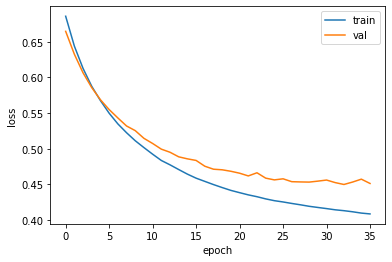

In [5]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [4]:
model2=keras.Sequential()
model2.add(keras.layers.Embedding(500,16,input_length=100))
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1,activation='sigmoid'))
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 simple_rnn (SimpleRNN)      (None, 8)                 200       
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 8,209
Trainable params: 8,209
Non-trainable params: 0
_________________________________________________________________


In [5]:
rmsprop=keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop,loss='binary_crossentropy',metrics=['accuracy'])
checkpoint_cb=keras.callbacks.ModelCheckpoint('best-embedding-model.h5',save_best_only=True)
early_stopping_cb=keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)

history=model2.fit(train_seq,train_target,epochs=100,batch_size=64,validation_data=(val_seq,val_target),callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 34s 99ms/step - loss: 0.6956 - accuracy: 0.5071 - val_loss: 0.6929 - val_accuracy: 0.5156
Epoch 2/100
313/313 [==============================] - 30s 97ms/step - loss: 0.6880 - accuracy: 0.5428 - val_loss: 0.6873 - val_accuracy: 0.5482
Epoch 3/100
313/313 [==============================] - 31s 98ms/step - loss: 0.6806 - accuracy: 0.5773 - val_loss: 0.6806 - val_accuracy: 0.5744
Epoch 4/100
313/313 [==============================] - 31s 98ms/step - loss: 0.6706 - accuracy: 0.6103 - val_loss: 0.6696 - val_accuracy: 0.6054
Epoch 5/100
313/313 [==============================] - 30s 97ms/step - loss: 0.6396 - accuracy: 0.6575 - val_loss: 0.5866 - val_accuracy: 0.7076
Epoch 6/100
313/313 [==============================] - 29s 94ms/step - loss: 0.5621 - accuracy: 0.7291 - val_loss: 0.5518 - val_accuracy: 0.7380
Epoch 7/100
313/313 [==============================] - 30s 96ms/step - loss: 0.5311 - accuracy: 0.7517 - val_loss: 0.5449 - val_ac

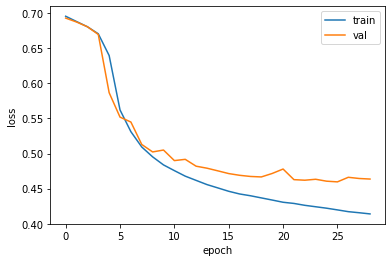

In [6]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()